## 1. 初始準備

In [45]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Keras functions
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD

# Keras dataset
from keras.datasets import mnist

# Keras utilis function
from keras.utils import np_utils

讀取 MNIST 手寫辨識資料

In [47]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [48]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [49]:
x_train = x_train.reshape(60000,28*28)

In [50]:
print(x_train.shape)

(60000, 784)


In [51]:
x_test = x_test.reshape(10000,28*28)

In [52]:
print(x_test.shape)

(10000, 784)


In [53]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [54]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


## 2. Model Functional API

在此之前，我們使用 Sequential 便足以建構大多數的神經網路，那是因為我們接觸的神經網路多為線性堆疊 (linear stack)。

除了輸入層需指定 input_dim 外，其餘隱藏層只需宣告，那是因為 Sequential 會認定上一層的輸出為這一層的輸入。

因此，再建構線性堆疊的神經網路時，Sequential 便足以處理。

### 2.1 Functional API 的使用時機

當神經網路模型為非線性的複雜網路結構，如：

* 多重輸出-多重輸入模型 (Multi-input and multi-output models)
    * 分歧 (branch)
    * 合併 (merge)
* 具重複/循環結構的模型，如: CycleGAN

Sequential 便不足以建構這類複雜結構的神經網路，我們以下介紹 Model Fnuctional API 的使用。

首先，我們先將 Model 引入。

In [55]:
from keras.models import Model

在 Model 的世界中，所有的神經網路層 (fully-connected, convolution, MaxPooling, LSTM, etc) 都被視作**函數來操作**，因此，我們只需關心函數的**輸入和輸出**即可。

此外，為了讓神經網路的第一層從不需要輸入 input_dim，我們還需引進下面這個函數來代替 input_dim。 (此寫法亦可用在 Sequential)

In [56]:
from keras.layers import Input

### 2.2 Functional API 的函數概念

回顧一下，我們想學習的手寫辨識模型是一個長得像這樣的函數

我們希望建立一個具有兩個隱藏層的神經網路來學習這個函數，攤開來看的話，如下：

或是以簡易的圖來表示這個全連接神經網路
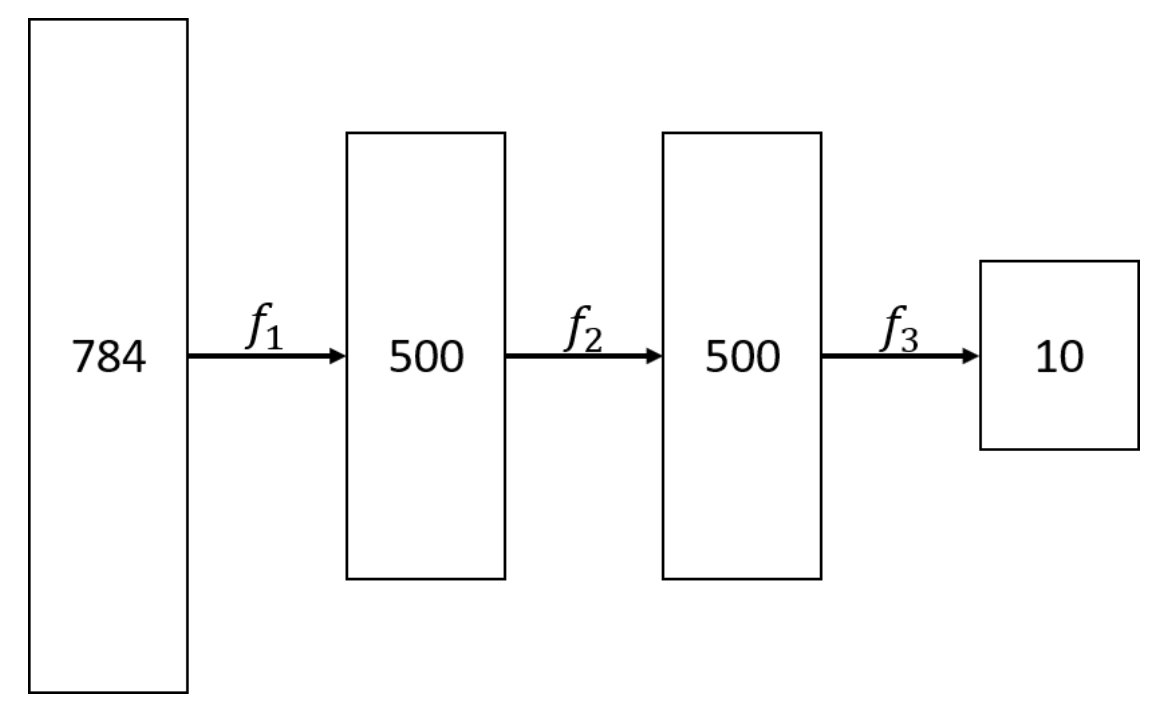

其中，$f_1, f_2, f_3$ 代表的是全連結層所代表的函數，其他變數說明如下：

* $x$: 代表的是輸入模型的圖片向量，為 784 維的向量。
* $h_1$: $x$ 經過第一層隱藏層運算後得結果，即為 $f_1(x)$，為 500 維的向量。
* $h_2$: $h_1$ 經過第二層隱藏層運算後得結果，即為 $f_2(h_1)$，為 500 維的向量。
* $y$: $h_2$ 經過最後一層運算後得結果，即為 $f_3(h_2)$，為 10 維的向量，代表的是 $x$ 為哪個數字的機率。

注意: 為了方便，我們將 Dense(500), Activation('sigmoid') 兩個合併用 Dense(500, activation='sigmoid') 表示

### 2.3 Functional API 的操作方式

我們沿用上圖的變數名稱來定義

In [57]:
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(500, activation='sigmoid')
f_3 = Dense(10, activation='softmax')

In [58]:
print(f_1)

接著，定義層前後變數之間的關係；首先，第一個變數必定以 Input 函數來定義

In [59]:
x = Input(shape=(784,))

In [60]:
print(x)

Tensor("input_3:0", shape=(?, 784), dtype=float32)


剩下的部分，就如變數說明，幾乎可以照著數學式輸入

$$h_1 = f_1(x), h_2 = f_2(h_1), y = f_3(h_2)$$

In [61]:
h_1 = f_1(x)
h_2 = f_2(h_1)
y = f_3(h_2)

In [62]:
print(h_1, h_2, y)

Tensor("dense_5/Sigmoid:0", shape=(?, 500), dtype=float32) Tensor("dense_6/Sigmoid:0", shape=(?, 500), dtype=float32) Tensor("dense_7/Softmax:0", shape=(?, 10), dtype=float32)


In [63]:
model = Model(x, y)

In [64]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.load_weights("handwriting_model_weights.h5")

OSError: Unable to open file (unable to open file: name = 'handwriting_model_weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)